# 3rd A - Study Case: Face Detector with Haar Cascade Algorithm

Face Detector with Haar Cascade Algorithm using OpenCV<br>

Naufal Mu'afi<br>
nmuafi1@gmail.com

---

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
plt.rcParams['figure.figsize'] = [15, 30]

### Load the Image

In [2]:
# if you work with Google Colab, please run this code below
# path='/content/children.jpg'

# if you work with Local Machine, please run this code below
path='./img/children.jpg'

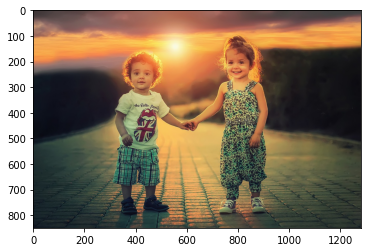

In [3]:
img = cv2.imread(path)
 
#ubah gambar menjadi RGB
imgrgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
 
plt.imshow(imgrgb)
plt.show()

### Load the Haar Cascades Feature

In [ ]:
# Face detector
!wget "https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml" -O haarcascade_frontalface_default.xml
 
# Eye detector
!wget "https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_eye.xml" -O haarcascade_eye.xml
 
# Smile detector
!wget "https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_smile.xml" -O haarcascade_smile.xml

In [ ]:
!ls

note: if you work with local machine, I recommend to you run those 2 cell above with Powershell/terminal

In [4]:
face_cascade = cv2.CascadeClassifier('./haarcascades/haarcascade_frontalface_default.xml')
 
img = cv2.imread(path)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

### Face Detection

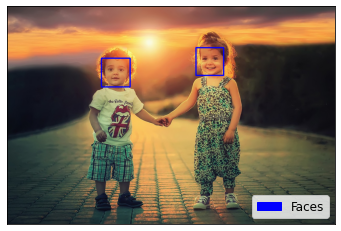

In [5]:
faces = face_cascade.detectMultiScale(
    gray,          
    scaleFactor = 1.3, 
    minNeighbors = 5
    )
 
for(x, y, w, h) in faces:
    img = cv2.rectangle(
        img,          # image object
        (x,y),        # kotak box position
        (x+w,y+h),    # box position
        (255,0,0),    # box color
        3             # box line-width
        )
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    
plt.xticks([])
plt.yticks([])
 
# create label description
face_patch = mpatches.Patch(color='blue', label='Faces')
plt.legend(handles=[face_patch], 
           loc='lower right', fontsize=12)
 
# Plot the image
imgplot = plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

### Face, Eye, and Smile Detection

In [6]:
face_cascade = cv2.CascadeClassifier('./haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./haarcascades/haarcascade_eye.xml')
smile_cascade = cv2.CascadeClassifier('./haarcascades/haarcascade_smile.xml')
 
img = cv2.imread(path)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

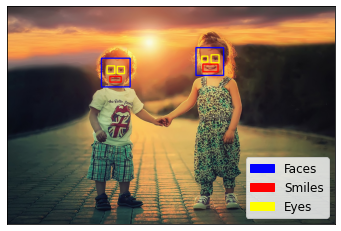

In [7]:
faces =  face_cascade.detectMultiScale(
    gray,          
    scaleFactor = 1.3, 
    minNeighbors = 5
    )
 
for(x, y, w, h) in faces:  
    img = cv2.rectangle(
        img,          # image object
        (x,y),        # initial box position (horizontal, vertical)
        (x+w,y+h),    # box position with width and height
        (255,0,0),    # box color in RGB
        3             # box line-width
        )
 
    # Set region of interest (ROI) as target area
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
 
    smiles = smile_cascade.detectMultiScale(roi_gray, minNeighbors=20)
    for(sx, sy, sw, sh) in smiles:
        cv2.rectangle(roi_color, (sx,sy), (sx+sw,sy+sh), (0,0,255), 3)
        
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for(ex, ey, ew, eh) in eyes:
        cv2.rectangle(roi_color, (ex,ey), (ex+ew,ey+eh), (0,255,255), 3)
    
plt.xticks([])
plt.yticks([])
 
face_patch = mpatches.Patch(color='blue', label='Faces')
smile_patch = mpatches.Patch(color='red', label='Smiles')
eye_patch = mpatches.Patch(color='yellow', label='Eyes')
plt.legend(handles=[face_patch, smile_patch, eye_patch], 
           loc='lower right', fontsize=12)
 
imgplot = plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))